In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def plot_graph(clustering):
    counts = np.zeros(clustering.children_.shape[0])
    n_samples = len(clustering.labels_)
    for i, merge in enumerate(clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([clustering.children_, clustering.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)


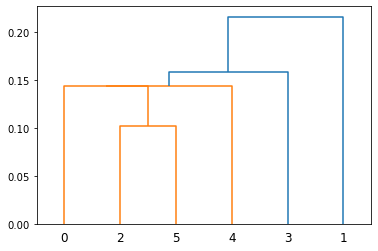

In [ ]:
X = np.array([[0.22,0.38], [0.4,0.53], [0.35,0.32],[0.26,0.19], [0.08,0.41], [0.45,0.3]])
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='single').fit(X)
plot_graph(clustering)

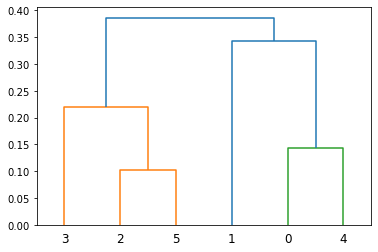

In [ ]:
X = np.array([[0.22,0.38], [0.4,0.53], [0.35,0.32],[0.26,0.19], [0.08,0.41], [0.45,0.3]])
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete').fit(X)
plot_graph(clustering)

In [ ]:
data=pd.read_csv('C:\\Users\\Nithish Kumar\\Downloads\\Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X=data.iloc[:,[3,4]].values

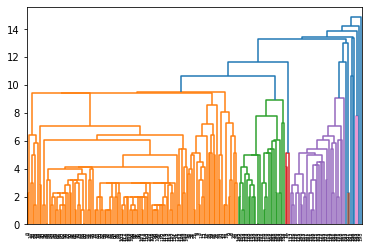

In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='single').fit(X)
plot_graph(clustering)

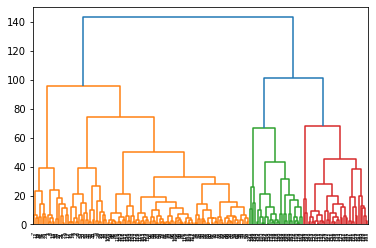

In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete').fit(X)
plot_graph(clustering)

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [ ]:
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

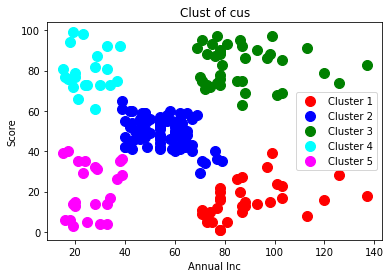

In [ ]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clust of cus')
plt.xlabel('Annual Inc')
plt.ylabel('Score')
plt.legend()
plt.show()